## **TASK 1 - Prediction Using Supervised ML**
* To predict the percentage of an student based on the no. of study hours they study.

### Author - Ashwin NS
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
print("Required libraries imported")

Required libraries imported


### Importing the dataset

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print("Data successfully imported")
data.tail(2)

Data successfully imported


,Hours,Scores
23,6.9,76
24,7.8,86


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.isnull == True

False

**No null values found in dataset, so let us visualize our data.**

### Data Visualisation

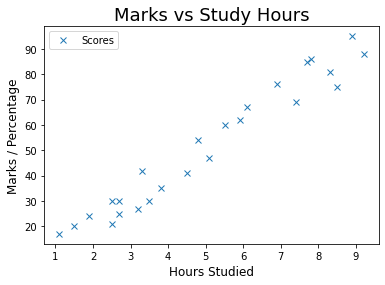

In [5]:
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Marks vs Study Hours',size=18)  
plt.xlabel('Hours Studied', size=12)  
plt.ylabel('Marks / Percentage', size=12)  
plt.show()

**The above scatter plot seems to suggest a correlation between the 'Marks / Percentage' and 'Hours Studied'. This indicates a positive linear relationship between hours studied and percentage. Plotting a regression line will confirm the correlation.**

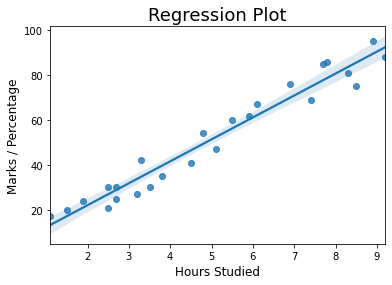

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=18)
plt.ylabel('Marks / Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**This confirms that the variables are positively correlated.**

### Preparing data and splitting it into train and test sets.

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Training the model using linear regression.

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model trained")

Model trained


### Predicting Marks.

In [9]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction.tail(2)

,Hours,Predicted Marks
5,3.8,39.710582
6,1.9,20.821393


### Comparing Predicted Marks with Actual Marks.

In [10]:
CompareScore = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
CompareScore.tail(2)

,Actual Marks,Predicted Marks
5,35,39.710582
6,24,20.821393


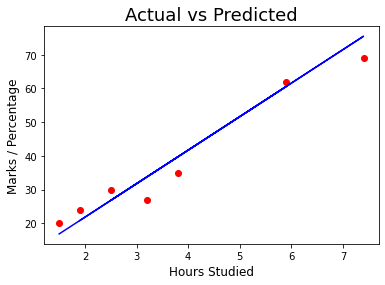

In [11]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='blue')
plt.title('Actual vs Predicted', size=18)
plt.ylabel('Marks / Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Accuracy of the Model.

In [12]:
metrics.r2_score(val_y,pred_y)

0.9367661043365056

**Above 93% percentage indicates that above fitted Model is a Good Model.**

### Evaluting the Model.

In [13]:
print("Mean Squared Error  > ",metrics.mean_squared_error(val_y,pred_y))
print("Mean Absolute Error > ",mean_absolute_error(val_y,pred_y))

Mean Squared Error  >  20.33292367497996
Mean Absolute Error >  4.130879918502482


**A small value for Mean Absolute Error means that the chances of error through this predictive model is very less.**

### Predicted marks for a student if they study for 9.25 hrs/day?

In [14]:
hrs = [9.25]
answer = regression.predict([hrs])
print("Marks = {}".format(round(answer[0],8)))

Marks = 93.89272889


**Depending on the Regression Model, for a student studying 9.25 hours per day, the predicted marks will be 93.89272889**